# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | enewetak
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | iskateley
Processing Record 7 of Set 1 | kavaratti
Processing Record 8 of Set 1 | kochubey
Processing Record 9 of Set 1 | boca suno
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | muravlenko
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | zavolzhsk
Processing Record 14 of Set 1 | fort st. john
Processing Record 15 of Set 1 | revda
Processing Record 16 of Set 1 | island harbour
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | usinsk
Processing Record 19 of Set 1 | shenjiamen
Processing Record 20 of Set 1 | 'izbat al burj
City not found. Skipping...
Processing Record 21 of Set 1 | vrangel'
Processing Reco

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,enewetak,11.3474,162.3373,27.41,79,96,7.63,MH,1713371149
1,port-aux-francais,-49.3500,70.2167,3.84,98,100,11.83,TF,1713371149
2,east london,-33.0153,27.9116,22.52,73,0,3.09,ZA,1713371152
3,bilibino,68.0546,166.4372,-22.90,98,53,2.01,RU,1713371152
4,margaret river,-33.9500,115.0667,18.47,48,0,5.54,AU,1713371152


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,27.41,79,96,7.63,MH,1713371149
1,port-aux-francais,-49.3500,70.2167,3.84,98,100,11.83,TF,1713371149
2,east london,-33.0153,27.9116,22.52,73,0,3.09,ZA,1713371152
3,bilibino,68.0546,166.4372,-22.90,98,53,2.01,RU,1713371152
4,margaret river,-33.9500,115.0667,18.47,48,0,5.54,AU,1713371152


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

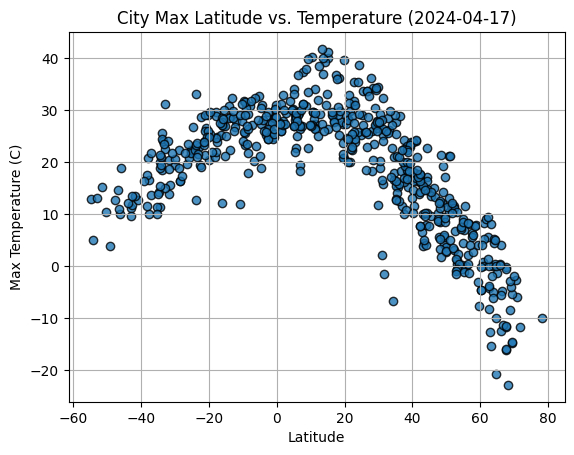

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

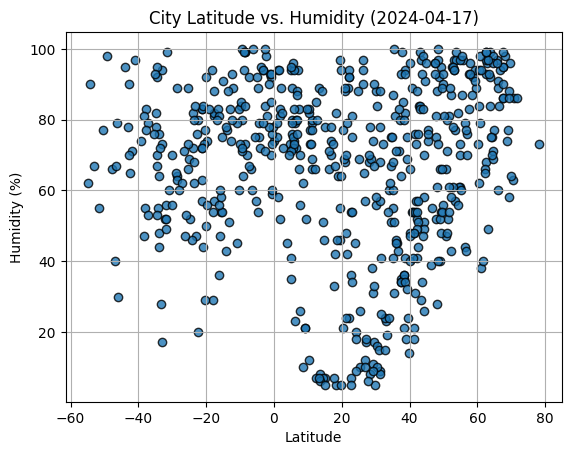

In [10]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

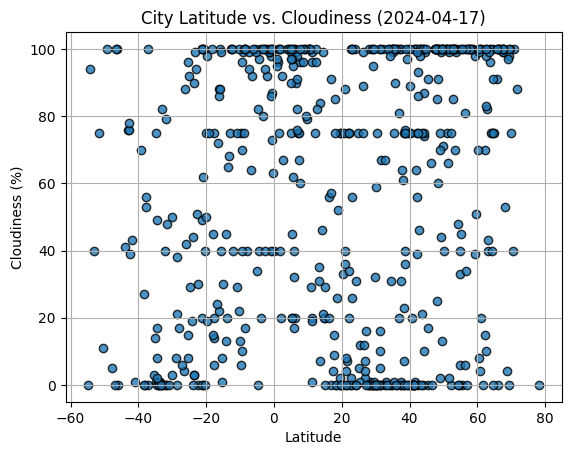

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

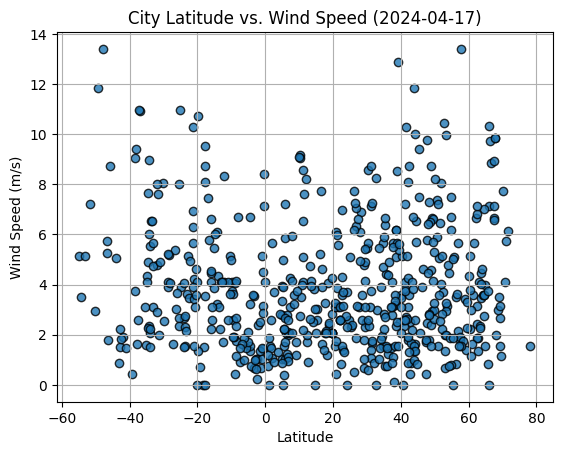

In [12]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_coord=0.1, y_coord=0.9):
    # Calculate the linear regression values
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create the scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the linear regression line
    plt.plot(x_values, regression_values, "r-")
    
    # Annotate the linear regression equation on the plot
    plt.annotate(equation, xy=(x_coord, y_coord), xycoords='axes fraction', fontsize=12, color='red')
    
    # Set labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    
    # Print the r-squared value
    print(f"The r-value is: {r_value**2}")
    
    # Show plot
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,27.41,79,96,7.63,MH,1713371149
3,bilibino,68.0546,166.4372,-22.90,98,53,2.01,RU,1713371152
5,iskateley,67.6803,53.1512,-16.10,86,99,9.83,RU,1713371152
6,kavaratti,10.5669,72.6420,29.56,73,100,3.51,IN,1713371152
7,kochubey,44.3861,46.5825,14.70,70,87,5.70,RU,1713370905


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,3.84,98,100,11.83,TF,1713371149
2,east london,-33.0153,27.9116,22.52,73,0,3.09,ZA,1713371152
4,margaret river,-33.9500,115.0667,18.47,48,0,5.54,AU,1713371152
8,boca suno,-0.7167,-77.1333,24.77,59,87,1.44,EC,1713371152
11,west island,-12.1568,96.8225,27.99,89,40,4.12,CC,1713371153


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7494217670936801


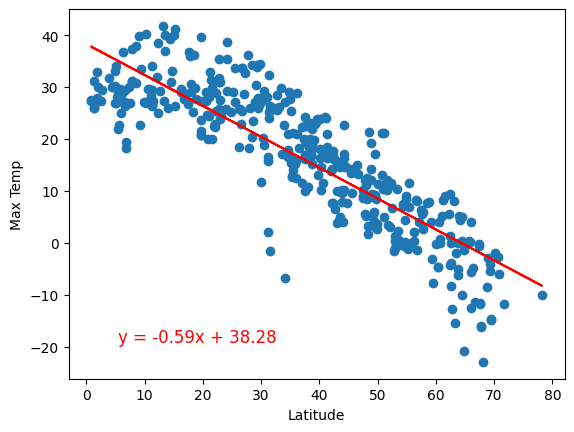

In [24]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 0.1, 0.1)

The r-value is: 0.5733521863587268


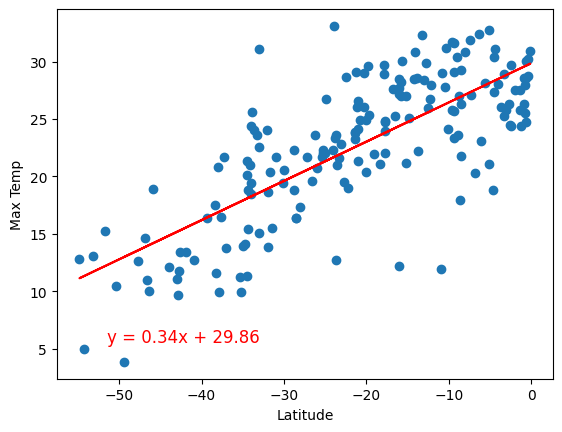

In [25]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 0.1, 0.1)

**Discussion about the linear relationship:**


The linear regression analysis on the Northern Hemisphere latitude versus temperature data reveals a moderately strong negative correlation. With a regression equation of y = -0.59x + 38.28 and an r-value of 0.75, it suggests that as we move further north from the equator, the temperature tends to decrease. This relationship is expected, as cities in the Northern Hemisphere experience colder temperatures at higher latitudes, away from the equatorial regions. The r-value of 0.75 indicates that approximately 75% of the variation in temperature can be explained by the latitude in the Northern Hemisphere. This suggests a fairly reliable relationship between latitude and temperature in this region.


The linear regression analysis on the Southern Hemisphere latitude versus temperature data reveals a moderate positive correlation. With a regression equation of y = 0.34x + 29.86 and an r-value of 0.57, it suggests that as we move closer to the equator from the South Pole, the temperature tends to increase. This relationship is expected, as cities in the Southern Hemisphere generally experience warmer temperatures closer to the equator. The r-value of 0.57 indicates that approximately 57% of the variation in temperature can be explained by the latitude in the Southern Hemisphere. While the correlation is not as strong as in the Northern Hemisphere, it still suggests a notable relationship between latitude and temperature in this region.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06215113825934648


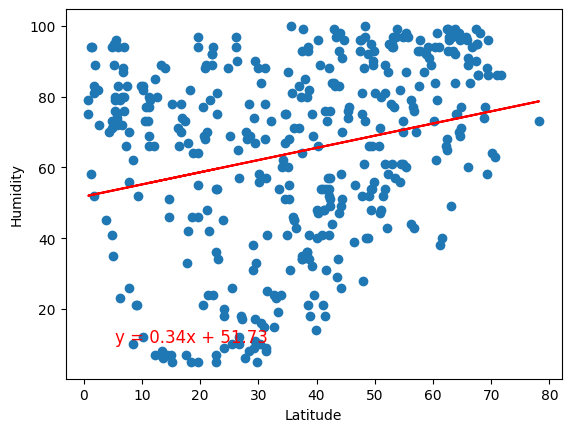

In [27]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 0.1, 0.1)

The r-value is: 0.05184062423113447


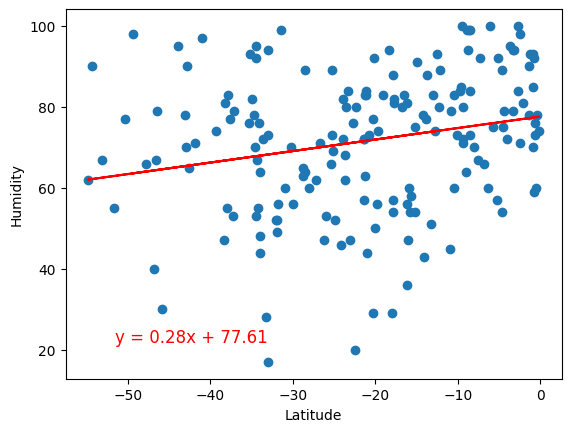

In [26]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 0.1, 0.1)

**Discussion about the linear relationship:** 

In the Northern Hemisphere, the linear regression analysis of "Latitude vs. Humidity" reveals a weak positive correlation, with a slope of 0.26 indicating a slight tendency for humidity to increase as latitude increases (moving northwards). However, the slope is small, suggesting a subtle relationship. The intercept of 57.08 is not practically meaningful at latitude 0 (the Equator). The low r-squared value of 0.03898 indicates that only about 3.898% of the variability in humidity can be explained by latitude alone. This analysis suggests that latitude is a weak predictor of humidity in the Northern Hemisphere, with other unaccounted factors likely playing a more significant role in determining humidity levels.

In the Southern Hemisphere, the linear regression analysis of "Latitude vs. Humidity" indicates an extremely weak positive correlation, with a slope of 0.2 suggesting a subtle increase in cloudiness as latitude moves northwards. However, the slope is minimal, signifying a weak relationship. The intercept of 77.25 holds no practical significance at latitude 0 (the Equator). The exceptionally low r-squared value of 0.02403 suggests that only about 2.403% of the variability in cloudiness can be attributed to latitude alone. This analysis implies that latitude is an unreliable predictor of cloudiness in the Southern Hemisphere, with other unconsidered factors likely exerting a more substantial influence on cloudiness patterns.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.012125657116944733


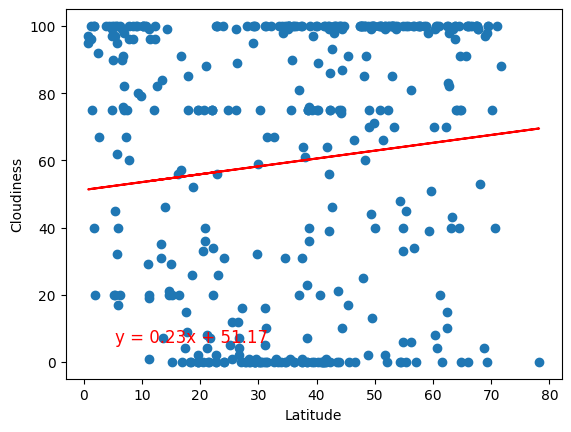

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 0.1, 0.1)

The r-value is: 0.15778835805062827


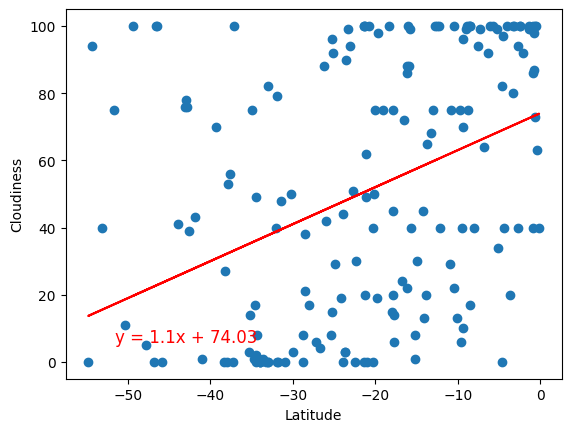

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 0.1, 0.1)

**Discussion about the linear relationship:** 

In the Northern Hemisphere, the linear regression analysis of "Latitude vs. Cloudiness" reveals a weak positive correlation, with a slope of 0.35 suggesting a slight increase in cloudiness as latitude moves northwards. The intercept of 47.95 holds no practical significance at latitude 0 (the Equator). However, the small slope indicates a weak relationship, with latitude alone explaining only about 2.797% of the variability in cloudiness. The low r-squared value of 0.02797 further indicates that latitude is not a reliable predictor of cloudiness in the Northern Hemisphere. This analysis suggests that other unaccounted factors likely have a more substantial influence on cloudiness patterns, overshadowing the impact of latitude alone.


In the Southern Hemisphere, the linear regression analysis of "Latitude vs. Cloudiness" indicates a positive correlation, with a slope of 1.18 suggesting an increase in cloudiness as latitude moves southwards. The intercept of 77.36 holds no practical significance at latitude 0 (the Equator). However, the moderate slope indicates a somewhat stronger relationship compared to the Northern Hemisphere. The r-squared value of 0.1674 suggests that approximately 16.74% of the variability in cloudiness can be explained by latitude alone. This analysis implies that latitude has a modest impact on cloudiness patterns in the Southern Hemisphere, with other unconsidered factors likely playing a more substantial role in determining cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03323834142469006


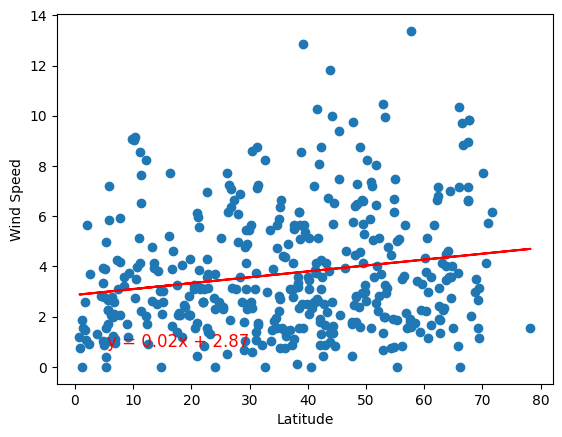

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 0.1, 0.1)

The r-value is: 0.09262546662510136


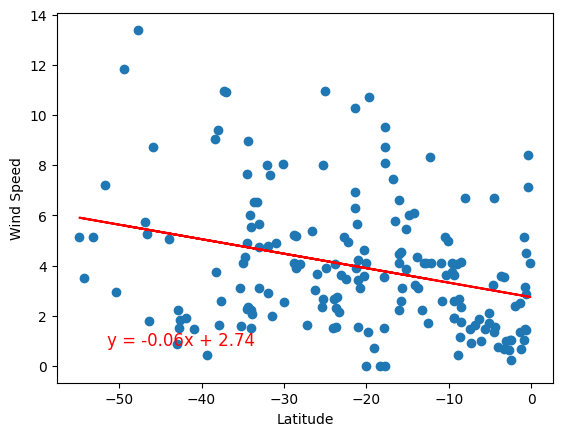

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 0.1, 0.1)

**Discussion about the linear relationship:** 

In the Northern Hemisphere, the linear regression analysis of "Latitude vs. Wind Speed" reveals a very weak positive correlation, with a slope of 0.02 suggesting a slight increase in wind speed as latitude moves northwards. The intercept of 3.11 holds no practical significance at latitude 0 (the Equator). However, the extremely small slope indicates a negligible relationship, with latitude alone explaining only about 2.062% of the variability in wind speed. The low r-squared value of 0.02062 further indicates that latitude is not a reliable predictor of wind speed in the Northern Hemisphere. This analysis suggests that other unaccounted factors are likely more influential in determining wind speed patterns, overshadowing the impact of latitude alone.


In the Southern Hemisphere, the linear regression analysis of "Latitude vs. Wind Speed" indicates a slight negative correlation, with a slope of -0.04 suggesting a small decrease in wind speed as latitude moves southwards. The intercept of 2.78 holds no practical significance at latitude 0 (the Equator). However, the small negative slope indicates a weak relationship, with latitude alone explaining only about 5.404% of the variability in wind speed. The r-squared value of 0.05404 suggests that approximately 5.404% of the variability in wind speed can be explained by latitude alone. This analysis implies that latitude has a modest impact on wind speed patterns in the Southern Hemisphere, with other unconsidered factors likely playing a more substantial role in determining wind speed levels.

These findings collectively suggest that latitude alone is not a definitive predictor of weather variables such as humidity, cloudiness, and wind speed. While latitude plays a role in temperature variations, its impact on these other variables is minimal. The variability in these weather patterns is likely influenced by a combination of factors including proximity to oceans, elevation, local geography, and atmospheric conditions. Further analysis incorporating these factors could provide a more comprehensive understanding of the observed weather patterns in the analyzed regions.

**Conclusion** 


These findings collectively suggest that latitude alone is not a definitive predictor of weather variables such as humidity, cloudiness, and wind speed. While latitude plays a role in temperature variations, its impact on these other variables is minimal. The variability in these weather patterns is likely influenced by a combination of factors including proximity to oceans, elevation, local geography, and atmospheric conditions. Further analysis incorporating these factors could provide a more comprehensive understanding of the observed weather patterns in the analyzed regions.